# Pandas
pandas is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support pandas data structures as inputs. Although a comprehensive introduction to the pandas API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the pandas docs site contains extensive documentation and many tutorials.

## Importing Library

In [1]:
import pandas as pd
import numpy as np
import os
#NumPy is a popular toolkit for scientific computing. pandas Series can be used as arguments to most NumPy functions.

The primary data structures in pandas are implemented as two classes:
* DataFrame, which you can imagine as a relational data table, with rows and named columns.
* Series, which is a single column. A DataFrame contains one or more Series and a name for each Series.

DataFrame objects can be created by passing a dict mapping string column names to their respective Series. If the Series don't match in length, missing values are filled with special NA/NaN values. Example:

In [2]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


But most of the time, you load an entire file into a DataFrame.
Read CSV from internet.
Load the California housing data set, and describle it. The "describe()" is inbuilt function in library, we can use it to get statistical details. 

In [3]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

Read CSV from Local Disk

In [4]:
california_housing_dataframe = pd.read_csv("D:/Machine Learning/Data set/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another useful function is DataFrame.head, which displays the first few records of a DataFrame:

In [5]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


hist() lets you quickly study the distribution of values in a column:

array([[<AxesSubplot:title={'center':'housing_median_age'}>]],
      dtype=object)

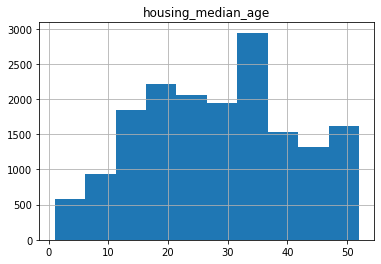

In [6]:
california_housing_dataframe.hist('housing_median_age')

# Accessing Data
accessing DataFrame data using familiar Python dict/list operations:

In [7]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
cities[0:2]

,City name,Population
0,San Francisco,852469
1,San Jose,1015785


# Manipulating Data
By applying Python's basic arithmetic operations to Series.

In [8]:
population / 1000.
np.log(population)
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


# Indexes
Both Series and DataFrame objects also define an index property that assigns an identifier value to each Series item or DataFrame row.

By default, at construction, pandas assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [9]:
print("City name Index: {} \nCity Index: {}".format(city_names.index ,cities.index))

City name Index: RangeIndex(start=0, stop=3, step=1) 
City Index: RangeIndex(start=0, stop=3, step=1)


using DataFrame.reindex to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [10]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density
2,Sacramento,485199,97.92,4955.055147
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760


Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.